# Análise de Dados e Inteligência Artificial - NHL

<p align="center">
    <img width=550 src="https://github.com/DanOliveira-DS/NHL/blob/master/images/web_hockey_basen_art.jpg?raw=true">
</p>

Muito inspirado por Michael Lewis e seu livro "*Moneyball: The Art of Winning an Unfair Game*" (leitura obrigatória para amantes da area que foi adaptado para o cinema com o título \"O Homem que Mudou o Jogo\", do diretor Bennett Miller) mostrou como a análise de dados aliado a um plano de jogo podem ser uma combinação fantástica. Nos últimos anos os avanços na tecnologia (dispositivos e sensores wearable como pulseiras eletrônicas, coletes, dispositivos GPS e outras tecnologias inteligentes) nos permitiram coletar cada vez mais dados. Entretanto, um monte de dados acumulados não são úteis se você não consegue interpretá-los. Portanto, tão importante quanto coletar dados estatísticos é saber decifrá-los. Com isso, a ciência de dados aplicada aos esportes já é uma realidade porque agora somos capazes de gerar valor através desses dados ajudando assim nas tomadas de decisão.

A análise desses novos dados possibilitou não apenas verificar estatísticas clássicas (vitorias, derrotas, gols feitos, gols sofridos..), mas tambem as estatísticas avançadas que procuram entender as diferentes maneiras com que uma jogada ou jogador pode influenciar uma partida. Com isso os times passaram a ser mais competitivos, sendo capazes de se prepararem  para um adversário ou até mesmo um jogador especifico que querem anular em uma partida. Tudo isso graças ao cruzamento de dados do histórico de desempenho dos atletas.

Outro uso da coleta desses dados está em beneficiar as grandes organizações com dados sociais, onde pode-se encontrar padrões e formar grupos dentro da base de fãs e executar campanhas em grupos-alvo. Conhecendo os fatores que mais atraem os fãs, a gestão das equipes pode se concentrar em melhorar esse aspecto, o que leva a ganhar novos fãs e reter os mais antigos. Os fãs podem ser alimentados com uma quantidade enorme de previsões e possibilidades em tempo real com as estatísticas do seu time ou jogador favorito onde podem comparar a sua performance com os outros jogadores no time rival ou do mesmo time.


A ciencia de dados tenta da sua maneira explorar as mesmas perguntas que os fãs e os treinadores se perguntam: quem eu acho que vai ganhar, e por quê? Quem são os melhores jogadores do mundo neste momento? Que estratégias são melhores, e porquê?.

<p align="center">
    <img width=650 src="https://github.com/DanOliveira-DS/NHL/blob/master/images/player.png?raw=true">
</p>

Mas é bom não confiar cegamente nas estatísticas. Por mais que o esporte americano seja excelente para criar uma base sólida de dados, o fator humano nunca pode ser deixado de lado. As estatísticas podem dizer algo, mas o contexto precisa ser levado em conta. Fatores que ainda não são representados nos dados, como a condição psicológica e o humor dos jogadores, também são chaves importantes na hora de analisar o jogo.


# Importando Bibliotecas


In [1]:
# suprimir avisos
import warnings
warnings.filterwarnings("ignore")

# bibliotecas para analise dos dados
import numpy as np # algebra linear
import pandas as pd # procesamento dos dados
import datetime

# setando opcoes globais do pandas
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# bibliotecas para visualização dos dados
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# Aquisição dos Dados
Os dados que usaremos nesse projeto foram coletados utilizando a **NHL stats API** e desponibilizados por Martin Ellis na plataforma Kaggle no formato *.csv*. Não são apenas os resultados e as estatísticas dos jogos da NHL, mas também detalhes de jogadas individuais, como chutes, gols e defesas, incluindo data, hora e coordenadas x e y. Ao total são 9 conjuntos de dados que se relacionam como apresentado na tabela abaixo:

<p align="center">
    <img width=900 src="https://github.com/DanOliveira-DS/NHL/blob/master/images/table_relationships.JPG?raw=true">
</p>


# Descrição dos conjuntos de dados:

* **game**: Reúne os registros de cada jogo no conjunto de dados;

* **game_golie_stats**: As estatísticas dos goleiros que participaram dos jogos;
  
* **game_plays**: As jogadas individuais de cada jogo;
    
* **game_plays_player**: Os jogadores envolvidos em uma jogada;
    
* **game_skater_stats**: As estatísticas básicas dos jogadores. 36 entradas por jogo, uma para cada jogador do time;

* **game_teams_stats**: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe;

* **player_info**: Informações sobre os jogadores;
    
* **team_info**: informação sobre as equipes.

Caso esteja interessado em ver como os dados são coletados, indico o vídeo do [Kevin Sidwar](https://www.youtube.com/watch?v=avp7fvuMT1E&t=214s). Ele é também um dos responsaveis por dar inicio a documentação da NHL stats api

# Importando os conjuntos de dados

In [2]:
# nhl_eda
nhl_eda = pd.read_csv('datasets/nhl_eda_cleaned.csv')

# game_golie_stats
golie_stats = pd.read_csv('datasets/game_goalie_stats_cleaned.csv')

# game_skater_stats
skater_stats = pd.read_csv('datasets/game_skater_cleaned.csv')

# plays
plays = pd.read_csv('nhl_datasets/plays_cleaned.csv', chunksize=5000)


como passamos o parametro chunksize quando importando o conjunto `plays` precisamos unir os blocos criados.

In [3]:
# lista que vai armazenar os blocos
chunk_list = []  
# iterar sobre os blocos
for chunk in plays:
    # armazenando os blocos
    chunk_list.append(chunk)

# concatenando os blocos
plays = pd.concat(chunk_list)

# Analise Exploratoria dos Dados
Antes de resolver um problema, é preciso conhecer os dados. A Análise Exploratória de Dados reúne um conjunto de ferramentas úteis para resumir e visualizar as características de uma base de dados. Deve ser parte fundamental de qualquer projeto de ciência de dados. Essas técnicas possibilitam criar uma primeira intuição sobre os dados, o que permite conhecer as suas informações, padrões e lançar hipóteses. Assim, gerando insights que auxiliam na criação de modelos de Machine Learning. 
Os principais componentes da AED incluem:

* Analise Estatística:
    * Descritiva;
    * Inferência.
* Visualização dos dados.

**Objetivos da Análise Explorátoria de Dados**

O objetivo principal da AED é maximizar a percepção do analista sobre um conjunto de dados e sobre a estrutura subjacente de um conjunto de dados. Fornecendo todos os itens específicos que um analista deseja extrair de um conjunto de dados, como:

* Obter uma visão geral da distribuição do conjunto de dados.
* Verificar se há valores numéricos ausentes, outliers ou outras anomalias no conjunto de dados.
* Descobrir padrões e relacionamentos entre variáveis no conjunto de dados.

## Comecando pelo basico


### Qual o tamanho do conjunto de dados? (Quantas observações e features)
A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.


In [9]:
# Dimensao do conjunto de dados nhl_eda
print(f"Em relação à dimensionalidade dos dados, nosso dataset é composto por {nhl_eda.shape[0]} observações(entradas) e {nhl_eda.shape[1]} features(colunas/variáveis).")

Em relação à dimensionalidade dos dados, nosso dataset é composto por 22868 observações(entradas) e 19 features(colunas/variáveis).


In [5]:
# primeiras entradas
nhl_eda.head()

,game_id,season,type,date_time,team_name,goals_for,goals_against,HoA,settled_in,head_coach,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways,outcome
0,2011030221,20112012,P,2012-04-29,Devils,3,4,away,OT,Peter DeBoer,26,31,12,3,1,44.9,6,7,L
1,2011030221,20112012,P,2012-04-29,Flyers,4,3,home,OT,Peter Laviolette,36,27,6,6,1,55.1,13,4,W
2,2011030222,20112012,P,2012-05-01,Devils,4,1,away,REG,Peter DeBoer,35,32,12,4,0,50.9,8,7,W
3,2011030222,20112012,P,2012-05-01,Flyers,1,4,home,REG,Peter Laviolette,20,24,32,5,0,49.1,9,6,L
4,2011030223,20112012,P,2012-05-03,Flyers,3,4,away,OT,Peter Laviolette,28,28,4,5,1,50.8,2,1,L


Descrição das variáveis:
* `game_id` - Número identificador da partida.
* `season` - Temporada em que ocorreu o jogo
* `type` - Indica se os jogos aconteceram na temporada regular (R) ou playoffs (P)
* `date_time` - Data que ocorreu a partida
* `team_name` - Nome do time
* `goals_for` - Número de gols a favor
* `goals_against` - Número de gols contra
* `HoA` - Indica se o time jogou como mandante (*home*) ou visitante (*away*)
* `settled_in` - Indica como o jogo foi resolvido: tempo regular (REG), overtime (OT) ou shootout (SO)
* `head_coach` - Nome do técnico  
* `shots` - Número de shots dado pelo time na partida
* `hits` - Número de hits dado pelo time na partida
* `pim` - Minutos de penalização atribuídos ao jogador.
* `powerPlayOpportunities` - Contabiliza o número de oportunidades no *power plays*
* `powerPlayGoals` - Número de gols no *power plays*
* `faceOffWinPercentage` - Porcentagem de vitória no faceoff
* `giveaways` - Contabiliza o erro que faz com que um jogador com posse do disco o perca para um jogador do time adversário.
* `takeways` - Contabiliza a ação forçada tomada por um jogador defensivo para recuperar a posse do disco para sua equipe
* `outcome` - Resultado da partida: L (derrotado) e W (vitorioso)

### Quais são os tipos de dados das minhas features? (Numéricos, categóricos)
Vamos realizar o levantamento dos tipos de variáveis que compõem o DataFrame a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas.

In [6]:
# tipos dos dados
nhl_eda.dtypes

game_id                     int64
season                      int64
type                       object
date_time                  object
team_name                  object
goals_for                   int64
goals_against               int64
HoA                        object
settled_in                 object
head_coach                 object
shots                       int64
hits                        int64
pim                         int64
powerPlayOpportunities      int64
powerPlayGoals              int64
faceOffWinPercentage      float64
giveaways                   int64
takeaways                   int64
outcome                    object
dtype: object

Em relacao aos tipos dos nossos dados nossas variaveis estao bem representadas. A unica variavel que iremos alterar o tipo e a `date_time` que foi lida como *object* e vamos transforma-la no tipo *datetime* isso abre a possibilidade de trabalharmos com series temporais. Esse procedimento foi feito na etapa de limpeza dos dados, mas por algum motivo o pandas leu as variavel de forma equivocada.

In [7]:
# realizando a mudanca do tipo da variavel
for column in ['date_time']:
    nhl_eda[column] = pd.to_datetime(nhl_eda[column], errors='coerce')

Vamos conferir para ver se a mudanca aconteceu.


In [8]:
nhl_eda.dtypes

game_id                            int64
season                             int64
type                              object
date_time                 datetime64[ns]
team_name                         object
goals_for                          int64
goals_against                      int64
HoA                               object
settled_in                        object
head_coach                        object
shots                              int64
hits                               int64
pim                                int64
powerPlayOpportunities             int64
powerPlayGoals                     int64
faceOffWinPercentage             float64
giveaways                          int64
takeaways                          int64
outcome                           object
dtype: object

Perfeito, vamos continuar.

### Valores Ausentes
Um passo importante na análise de dados é verificação de dados ausentes, isso porque a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Caso eles sejam significativos será necessário um tratamento nos dados antes de realizarmos nossas análises.

In [10]:
# verificando valores ausentes
nhl_eda.isna().sum()

game_id                   0
season                    0
type                      0
date_time                 0
team_name                 0
goals_for                 0
goals_against             0
HoA                       0
settled_in                0
head_coach                0
shots                     0
hits                      0
pim                       0
powerPlayOpportunities    0
powerPlayGoals            0
faceOffWinPercentage      0
giveaways                 0
takeaways                 0
outcome                   0
dtype: int64

Podemos ver que temos um conjunto de dados bem limpo.


### Estatistica Descritiva
Como o nome sugere, ajudam a descrever e compreender os conjuntos de dados, apresentando-os de uma maneira mais significativa o que permite uma interpretação mais simples dos dados. Os tipos mais comuns de estatística descritiva incluem:
* Medidas de Tendencia Centrais:
    * Media;
    * Mediana;
    * Moda.
* Medidas de dispersão:
    * Desvio Padrão;
    * Intervalo Interquartil;
    * Curtoses;
    * Enviesamento.
    
Podemos usar a funcao *describe()* do pandas onde imediatamente obtemos um resumo contendo algumas das principais informações estatísticas relevantes:

* count – quantidade de entradas válidas
* mean – média dos valores
* std – desvio padrão
* min – menor valor da coluna
* 25% - (Q1) primeiro quartil 25
* 50% - mediana
* 75% - (Q3) terceiro quartil 75
* max – maior valor da coluna

Ainda é possível identificar colunas com possíveis outliers (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)



In [11]:
# resumo estatistico
nhl_eda.describe()

,game_id,season,goals_for,goals_against,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
count,2.286800e+04,2.286800e+04,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000,22868.000000
mean,2.014134e+09,2.014315e+07,2.743047,2.794254,30.396405,23.607574,10.175791,3.179334,0.592356,50.000000,8.648155,6.919801
std,2.609562e+06,2.609836e+04,1.640201,1.641038,6.832590,8.595527,8.038863,1.562107,0.759193,7.203451,4.861654,3.840531
min,2.010020e+09,2.010201e+07,0.000000,0.000000,10.000000,2.000000,0.000000,0.000000,0.000000,20.800000,0.000000,0.000000
25%,2.012020e+09,2.012201e+07,2.000000,2.000000,26.000000,17.000000,6.000000,2.000000,0.000000,45.200000,5.000000,4.000000
50%,2.014021e+09,2.014202e+07,3.000000,3.000000,30.000000,23.000000,8.000000,3.000000,0.000000,50.000000,8.000000,6.000000
75%,2.016021e+09,2.016202e+07,4.000000,4.000000,35.000000,29.000000,12.000000,4.000000,1.000000,54.800000,12.000000,9.000000
max,2.018030e+09,2.018202e+07,10.000000,10.000000,64.000000,80.000000,183.000000,12.000000,6.000000,79.200000,36.000000,31.000000


Alguns pontos interessantes sobre resumo estatístico:
* A variável `game_id` atua apenas como um identificador para os jogos. Não carrega qualquer informação relevante portanto e uma feature que pode ser excluída.
* A variável `season` assim como `game_id` atua como um identificador. Entretanto, apesar do seu resultado não fazer muito sentido podemos atuar de uma outra forma (visualizao grafica) que iremos ver logo mais.
* Podemos ver a presença de *outliers*  na maioria das variáveis. Entender a presença desses outliers é importante porque os valores discrepantes distorcem nossa distribuição o que pode influenciar negativamente na performance dos algoritmos de machine learning já que eles geralmente assumem uma distribuição uni variada gaussiana nas variáveis de entrada.

A proxima etepa e a de visualizacao dos dados.

## Visualizacao dos dados

## Histogramas
Uma maneira rápida de ter uma ideia da distribuição de cada atributo é observar os histogramas. Os histogramas agrupam dados em posições e fornecem uma contagem do número de observações em cada posição. A partir da forma das caixas, você pode ter uma ideia rápida de se um atributo é gaussiano, inclinado(skewed) ou mesmo tem uma distribuição exponencial. Também pode ajudar a ver possíveis discrepâncias.

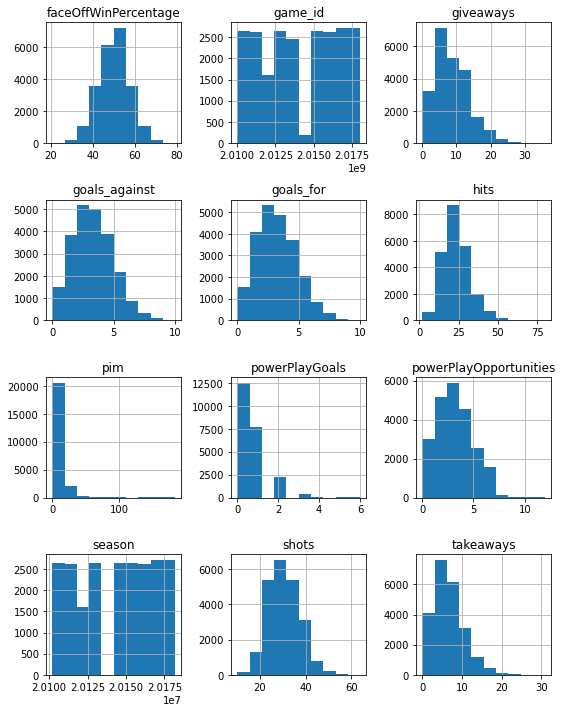

In [18]:
# histograma
nhl_eda.hist(bins=10, figsize=(8, 10))
plt.tight_layout()

As variáveis `pim`, `powerPlayGoals` apresentam um comportamento exponencial as variáveis `season` e `game_id` um comportamento uniforme com uma queda bastante brusca no mesmo período da escala vamos utilizar outro método de visualização para investigar essas causa. As outras variáveis possuem um comportamento que lembra bem o gaussiano.

## Analise Univariada
Vamos analisar a variável `season` e tentar entender o motivo dela apresentar tal comportamento.

Como sabemos nosso conjunto de dados abrange as temporadas de 2010-2011 ate 2018-2019 o que sao 9 anos de dados sobre a liga de hoquei


### Quantos jogos tivemos por temporada?

Numero de jogos por temporada:
20182019    2716
20172018    2710
20132014    2646
20152016    2642
20102011    2638
20142015    2638
20162017    2634
20112012    2632
20122013    1612
Name: season, dtype: int64


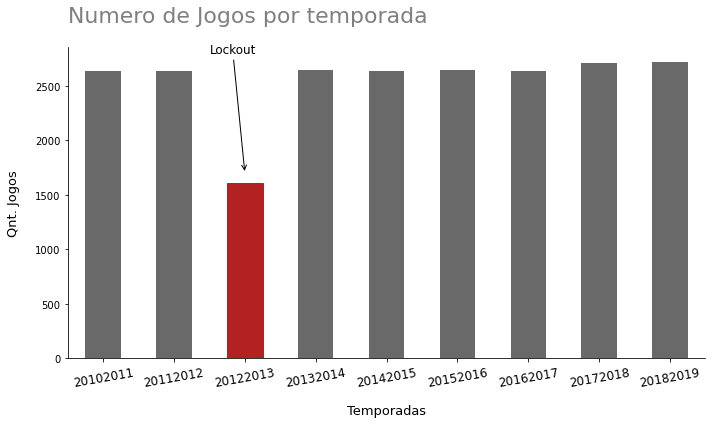

In [67]:
# numero de jogos por temporada
num_jogos_season = nhl_eda['season'].value_counts()
print(f"Numero de jogos por temporada:\n{num_jogos_season}")

# plotando resultado
fig, ax = plt.subplots(figsize=(10, 6))
num_jogos_season.sort_index().plot(kind='bar',color='dimgrey', ax=ax)

# titulos
ax.set_title("Numero de Jogos por temporada", fontsize=22, loc='left', pad=25, alpha=0.5)
ax.set_ylabel("Qnt. Jogos", fontsize=13, labelpad=15)
ax.set_xlabel("Temporadas", fontsize=13, labelpad=15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=10)


# estilizando imagem
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.annotate('Lockout',fontsize=12, xy=(2, 1700), xytext=(1.5, 2800),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
ax.patches[2].set_color('firebrick')
plt.tight_layout()